In [7]:
library(tidyverse)

Commands used:

plink --bfile gwas_data --check-sex --out GWA-QC

plink --bfile gwas_data --remove wrong_sex.txt --make-bed --out GWA-QC

plink --bfile GWA-QC --missing --out GWA-QC

plink --bfile GWA-QC --het --out GWA-QC

plink --bfile GWA-QC --remove wrong_het_missing_values.txt --make-bed --out GWA-QC-filtered

plink --bfile GWA-QC-filtered --indep-pairwise 500kb 5 0.2 --out GWA-QC GWA-QC-filtered

plink --bfile GWA-QC-filtered --extract GWA-QC.prune.in --genome --min 0.185 --out GWA-QC GWA-QC-filtered

plink --bfile  GWA-QC-filtered --remove wrong_ibd.txt --make-bed --out GWA-QC GWA-QC-filtered

Adding phenotype to main file

Plink --bfile GWA-QC-filtered –pheno eye_color_pheno.fam –pheno-name group --make-bed --out GWA-QC-filtered-pheno

Plink --bfile GWA-QC-filtered-pheno --test-missing --out GWA-QC-filtered-pheno

plink --bfile GWA-QC-filtered-pheno --exclude fail-diffmiss-qc.txt --geno 0.05 --hwe 0.00001 --maf 0.01 --make-bed --out GWA-QC-filtered-pheno-q

In [48]:
df <- read.table("eye_color.txt")
head(df)

,V1,V2
,<int>,<chr>
1,10012,dark_brown
2,10036,brown
3,10058,hazel/brown-green
4,10074,hazel/brown-green
5,10077,green-gray
6,10080,green


In [8]:
d_miss <- read.table("GWA-QC.imiss",header=T)
#d_miss
d_het <- read.table("GWA-QC.het",header=T)
#d_het
d <- inner_join(d_miss,d_het)
head(d)

Joining with `by = join_by(FID, IID)`


,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS,O.HOM.,E.HOM.,N.NM.,F
,<int>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,10645,10645,Y,879039,1374809,0.6394,310932,310600,468977,0.002132
2,10542,10542,Y,778868,1374809,0.5665,365681,365200,531055,0.002995
3,10653,10653,Y,857317,1374809,0.6236,325278,324600,490395,0.004273
4,10106,10106,Y,857552,1374809,0.6238,328144,324400,490164,0.022480
5,10559,10559,Y,857063,1376653,0.6226,361020,359900,451712,0.012050
6,10828,10828,Y,857132,1374809,0.6235,361111,359400,451017,0.018490


In [9]:
O.HET. <- (d$N.NM-d$O.HOM.) / d$N.NM
d <- d %>% mutate(O.HET.)
head(d)

,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS,O.HOM.,E.HOM.,N.NM.,F,O.HET.
,<int>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,10645,10645,Y,879039,1374809,0.6394,310932,310600,468977,0.002132,0.3369995
2,10542,10542,Y,778868,1374809,0.5665,365681,365200,531055,0.002995,0.3114065
3,10653,10653,Y,857317,1374809,0.6236,325278,324600,490395,0.004273,0.3367020
4,10106,10106,Y,857552,1374809,0.6238,328144,324400,490164,0.022480,0.3305424
5,10559,10559,Y,857063,1376653,0.6226,361020,359900,451712,0.012050,0.2007739
6,10828,10828,Y,857132,1374809,0.6235,361111,359400,451017,0.018490,0.1993406


Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


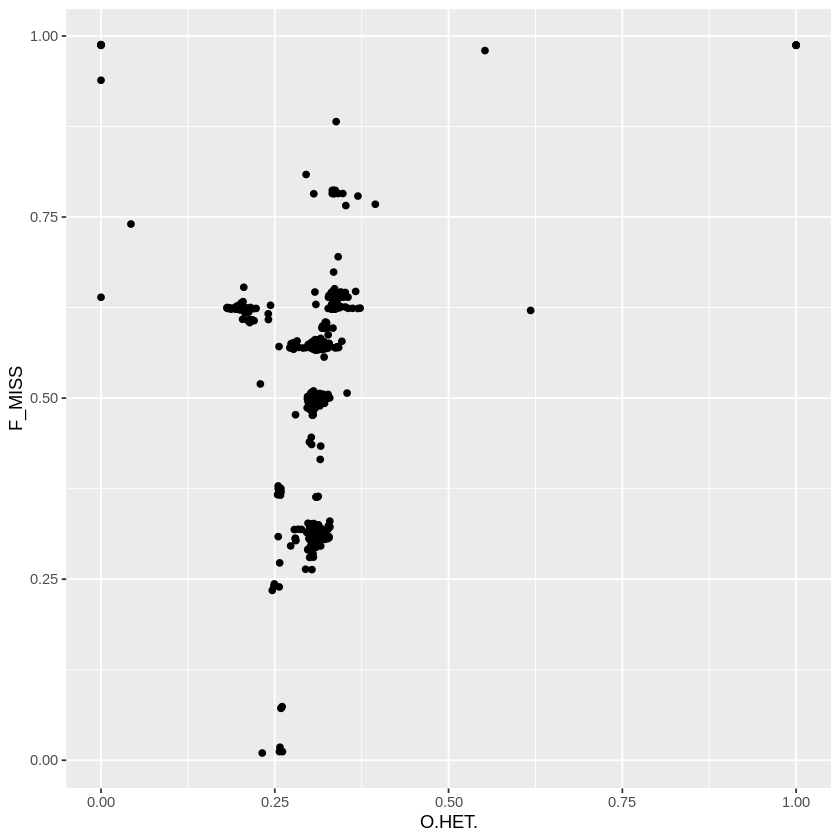

In [6]:
ggplot(d) + 
    geom_point(aes(x = O.HET., y = F_MISS))

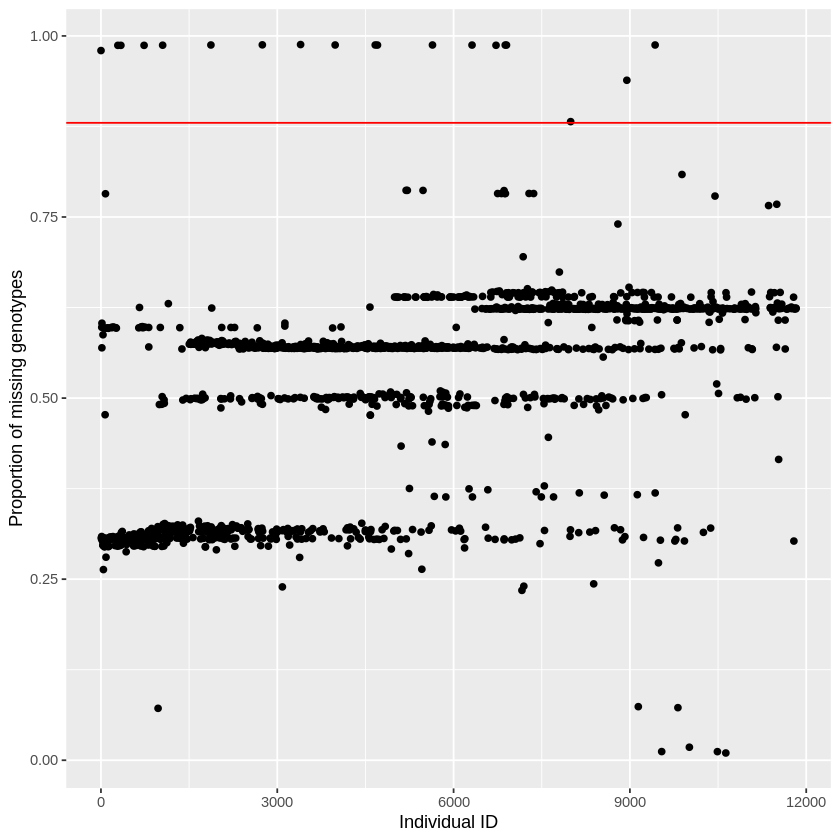

In [13]:
ggplot(d) + 
    geom_point(aes(x = IID, y = F_MISS)) +
    labs(x = "Individual ID", y = "Proportion of missing genotypes") +
    geom_hline(yintercept = 0.88, color = "red")

remove the very top

In [17]:
# remove NaN
# d$O.HET.
d <- d[!is.nan(d$O.HET.), ] # still in file

In [18]:
d$O.HET.

[1] 0.33699947 0.31140654 0.33670205 0.33054243 0.20077394 0.19934060
   [7] 0.30295846 0.29723769 0.31325217 0.30672267 0.55239209 0.33625851
  [13] 0.36959352 0.33321711 0.33457490 0.33398511 0.20613871 0.33550540
  [19] 0.32683068 0.33140549 0.30304088 0.31052619 0.30213532 0.30405012
  [25] 0.19882297 0.30792091 0.32395280 0.33676074 0.30739340 0.30605313
  [31] 0.20372355 0.19962646 0.33281125 0.20250958 0.21020071 0.30593936
  [37] 0.20333360 0.19851057 0.30371081 0.30751700 0.30554433 0.19944312
  [43] 0.33467961 0.31116356 0.30466143 0.19982440 0.26102060 0.19538435
  [49] 0.20118331 0.33310318 0.30566672 0.30886755 0.33145544 0.20119848
  [55] 0.30116029 0.30145284 0.19934801 0.30470850 0.19902418 0.33195137
  [61] 0.30493757 0.19909592 0.20433431 0.30072157 0.30825648 0.19692000
  [67] 0.33557911 0.20031244 0.30616345 0.20116067 0.32163631 0.20194907
  [73] 0.36965883 0.30513169 0.20034784 0.31714234 0.31428439 0.30615102
  [79] 0.19917745 0.19681970 0.19383058 0.30453948 0.33040023 0.30551131
  [85] 0.18212657 0.30722446 0.30612206 0.33236645 0.32166711 0.30296121
  [91] 0.31076991 0.30757414 0.30269099 0.30868831 0.19739729 0.33057068
  [97] 0.33461211 0.33717655 0.20047871 0.30483051 0.30469805 0.24082659
 [103] 0.22927104 0.20032660 0.30618457 0.33457026 0.30586196 0.33208402
 [109] 0.20142500 0.23195895 0.33107645 0.19919208 0.19758695 0.20838929
 [115] 0.21244709 0.33444077 0.33427558 0.30466152 0.19853644 0.33350538
 [121] 0.30626105 0.19348221 0.35554136 0.19762049 0.33361756 0.30369374
 [127] 0.30585090 0.30080469 0.20079922 0.33681002 0.30803212 0.20055260
 [133] 0.19551190 0.33485556 0.30501586 0.25746198 0.19936040 0.33290678
 [139] 0.30406965 0.30387511 0.33715621 0.30470837 0.30630822 0.30369669
 [145] 0.33154403 0.31538790 0.33292363 0.30345721 0.30769500 0.30495762
 [151] 0.30772821 0.30379957 0.30317877 0.33342175 0.30791971 0.31028389
 [157] 0.30497742 0.18692427 0.29936849 0.30265506 0.30495860 0.34507061
 [163] 0.30897596 0.30185636 0.30776266 0.20088158 0.30396488 0.32998934
 [169] 0.29931014 0.30378977 0.30314954 0.30527474 0.32504003 0.32175993
 [175] 0.30750366 0.20208860 0.32793853 0.30620138 0.30758879 0.30613003
 [181] 0.28843877 0.20096865 0.33500646 0.19894580 0.30029099 0.30526538
 [187] 0.30352842 0.30377092 0.33264382 0.31219861 0.30161046 0.30371897
 [193] 0.30589977 0.31826939 0.33160367 0.33231654 0.30572621 0.30497883
 [199] 0.35165106 0.19646684 0.33347347 0.30186130 0.33250027 0.30499864
 [205] 0.19897255 0.33037265 0.30316443 0.30545560 0.19906960 0.30394527
 [211] 0.30702618 0.21473082 0.32143687 0.30837153 0.31037633 0.30456451
 [217] 0.30427549 0.33786581 0.30423960 0.31291955 0.30763523 0.30451238
 [223] 0.30128100 0.30427413 0.30120469 0.30982914 0.30715886 0.19955073
 [229] 0.20974036 0.30366146 0.32562089 0.20098751 0.30566414 0.30470324
 [235] 0.30469701 0.30336567 0.21434081 0.30236142 0.32386324 0.30567879
 [241] 0.30722438 0.19901888 0.30475403 0.20705244 0.30322896 0.30441012
 [247] 0.30430756 0.33054547 0.30335251 0.33221967 0.33227726 0.33458802
 [253] 0.30368164 0.30218687 0.30325223 0.20016203 0.33100335 0.30888456
 [259] 0.30290385 0.20156248 0.35221245 0.33899949 0.30165245 0.33462581
 [265] 0.30880895 0.30564114 0.30418859 0.30115413 0.39464139 0.20276523
 [271] 0.30785872 0.31642512 0.31316489 0.30757105 0.30442727 0.30932528
 [277] 0.30620330 0.32932309 0.27949294 0.30659513 0.30756409 0.30393786
 [283] 0.30481842 0.30805304 0.30050423 0.30449127 0.31312718 0.30788965
 [289] 0.31539342 0.30441147 0.31071035 0.30931773 0.31168353 0.30904027
 [295] 0.30780816 0.29750336 0.30755450 0.31002149 0.30815510 0.30773888
 [301] 0.30314579 0.30732387 0.30512006 0.30723043 0.31162332 0.30498988
 [307] 0.30229552 0.30663853 0.30246952 0.30139558 0.30784642 0.30856908
 [313] 0.30928018 0.30983832 0.30424194 0.30721703 0.30504187 0.30941111
 [319] 0.30932800 0.32748967 0.30190406 0.30706604 0.30658214 0.30492427
 [325] 0.31050366 0.30914399 0.31132377 0.30685598 0.30290679

In [20]:
mean_het <- mean(d$O.HET.)
sd_het <- sd(d$O.HET.)
het_lower <- mean_het - 3*sd_het
het_upper <- mean_het + 3*sd_het
het_lower
het_upper
d_m <- d %>% filter(F_MISS >= 0.88 | O.HET.<het_lower | O.HET. > het_upper) # 0.88 to remove top individuals for F_MISS
head(d)
nrow(d_m)

[1] 0.1266094

[1] 0.464334

,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS,O.HOM.,E.HOM.,N.NM.,F,O.HET.
,<int>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,10645,10645,Y,879039,1374809,0.6394,310932,310600,468977,0.002132,0.3369995
2,10542,10542,Y,778868,1374809,0.5665,365681,365200,531055,0.002995,0.3114065
3,10653,10653,Y,857317,1374809,0.6236,325278,324600,490395,0.004273,0.3367020
4,10106,10106,Y,857552,1374809,0.6238,328144,324400,490164,0.022480,0.3305424
5,10559,10559,Y,857063,1376653,0.6226,361020,359900,451712,0.012050,0.2007739
6,10828,10828,Y,857132,1374809,0.6235,361111,359400,451017,0.018490,0.1993406


[1] 15

In [21]:
write.table(d_m, file = "wrong_het_missing_values.txt", col.names = F, row.names = F)

In [11]:
#dfil <- read.table("GWA-QC-filtered.",header=T) # how to read

In [23]:
#first ibd
ibd1 <- read.table('GWA-QC-filtered.genome', header = TRUE)
ibd1

FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO
<int>,<int>,<int>,<int>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
10645,10645,1050,1050,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10645,10645,339,339,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10645,10645,4667,4667,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10645,10645,5641,5641,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10645,10645,6314,6314,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10645,10645,6879,6879,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10645,10645,9429,9429,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10542,10542,1050,1050,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10542,10542,339,339,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA


In [24]:
ibd <- read.table('GWA-QC-filtered.genome', header = TRUE)
ibd # 52635 × 14

FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO
<int>,<int>,<int>,<int>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
10645,10645,1050,1050,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10645,10645,339,339,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10645,10645,4667,4667,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10645,10645,5641,5641,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10645,10645,6314,6314,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10645,10645,6879,6879,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10645,10645,9429,9429,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10542,10542,1050,1050,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA
10542,10542,339,339,UN,NA,NaN,NaN,NaN,NaN,-1,NaN,NA,NA


In [25]:
ibd <- ibd[!is.nan(ibd$Z0), ] # removing nan individuals
ibd # 39734 x 14, Viktor has 41000

,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO
,<int>,<int>,<int>,<int>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
29,10559,10559,10828,10828,UN,NA,0.6534,0.1114,0.2352,0.2909,-1,0.881522,0.3747,1.9736
30,10559,10559,10058,10058,UN,NA,0.6660,0.1094,0.2245,0.2793,-1,0.879652,0.1853,1.9267
31,10559,10559,10765,10765,UN,NA,0.6696,0.0978,0.2325,0.2815,-1,0.880244,0.0824,1.8885
32,10559,10559,10520,10520,UN,NA,0.6339,0.1249,0.2412,0.3037,-1,0.883343,0.6930,2.0430
33,10559,10559,10074,10074,UN,NA,0.6660,0.0941,0.2399,0.2870,-1,0.881219,0.0244,1.8433
34,10559,10559,10171,10171,UN,NA,0.7225,0.0254,0.2521,0.2648,-1,0.878955,0.0000,1.7027
35,10559,10559,10347,10347,UN,NA,0.6695,0.1073,0.2232,0.2769,-1,0.879302,0.3529,1.9686
36,10559,10559,10926,10926,UN,NA,0.6626,0.1110,0.2264,0.2819,-1,0.880052,0.4834,1.9965
37,10559,10559,10142,10142,UN,NA,0.6668,0.0853,0.2479,0.2906,-1,0.881987,0.4015,1.9794


In [27]:
members <- ibd$FID1 # remove individual mentioned first
members <- unique(members)
write.table(cbind(members,members), file = 'wrong_ibd.txt', col.names = F, row.names = F)

In [33]:
length(members)

[1] 304

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


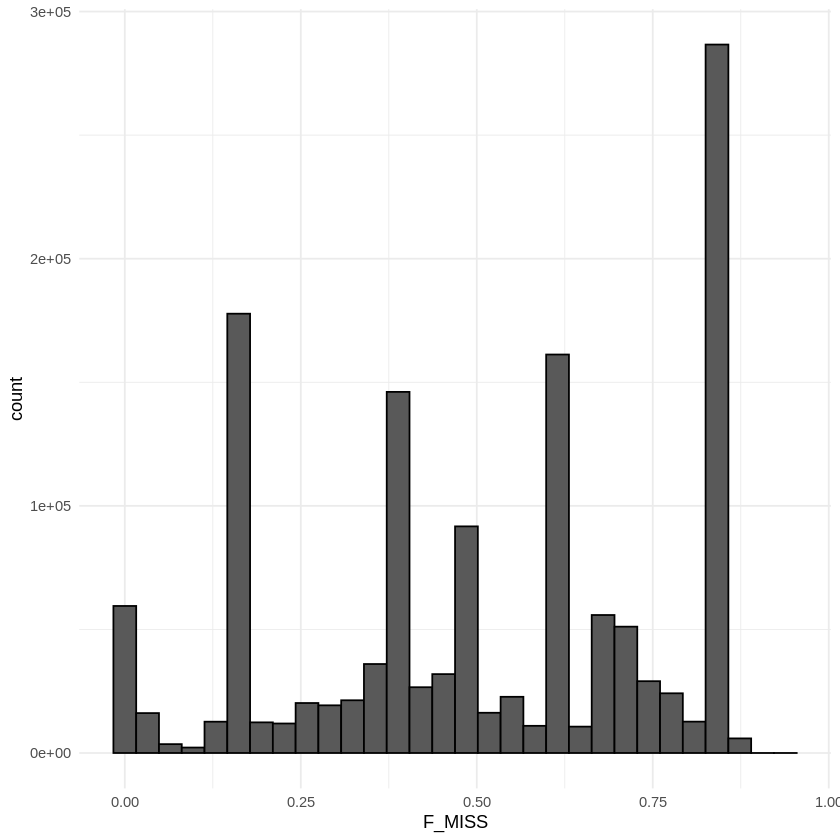

In [34]:
# first
# missing, lmiss is for SNPs
lmiss <- read.table('GWA-QC-filtered.lmiss', header = T)
ggplot(lmiss) +
    geom_histogram(aes(x = F_MISS), col = 'black') + 
    theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


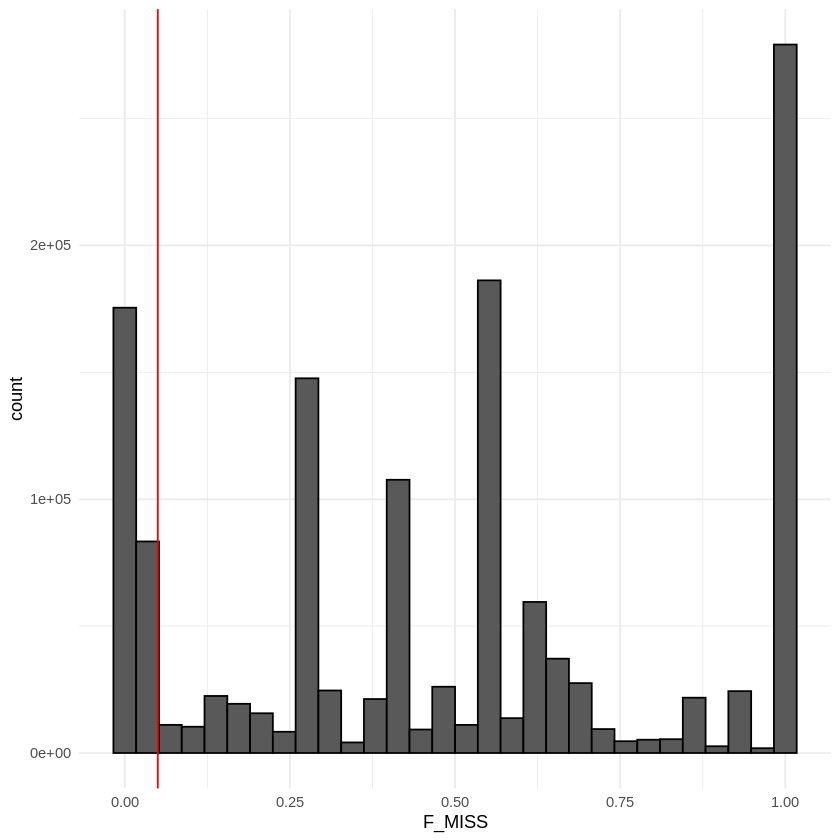

In [3]:
# missing, lmiss is for SNPs, the right one
lmiss <- read.table('GWA-QC-filtered.lmiss', header = T)
ggplot(lmiss) +
    geom_histogram(aes(x = F_MISS), col = 'black') +
    geom_vline(xintercept = 0.05, color = "red") +
    theme_minimal()

In [42]:
unique(df$V2)

[1] "dark_brown"                                          
 [2] "brown"                                               
 [3] "hazel/brown-green"                                   
 [4] "green-gray"                                          
 [5] "green"                                               
 [6] "blue"                                                
 [7] "green_with_brown_freckles"                           
 [8] "blue-grey"                                           
 [9] "red/blood"                                           
[10] "blue-green-grey"                                     
[11] "blue-green"                                          
[12] "hazel_green"                                         
[13] "amber-brown"                                         
[14] "blue/green/grey_-_changes_with_lighting_and_clothing"
[15] "black"                                               
[16] "blue-green_heterochromia"                            
[17] "dark_blue"                                           
[18] "blue-green-gold"

In [43]:
df %>% group_by(V2) %>% summarise(n = n())

V2,n
<chr>,<int>
amber-brown,13
black,2
blue,328
blue-green,123
blue-green-gold,8
blue-green-grey,39
blue-green_heterochromia,1
blue-grey,188
blue/green/grey_-_changes_with_lighting_and_clothing,2


In [49]:
df$group <- ifelse(grepl("brown", df$V2, ignore.case = TRUE), "Brown", "Light")

In [51]:
df$V2 <- df$V1

In [52]:
df

V1,V2,group
<int>,<int>,<chr>
10012,10012,Brown
10036,10036,Brown
10058,10058,Brown
10074,10074,Brown
10077,10077,Light
10080,10080,Light
10093,10093,Brown
10097,10097,Light
10100,10100,Brown


In [53]:
names(df)[which(names(df) == "V1")] <- "FID"
names(df)[which(names(df) == "V2")] <- "IID"

In [54]:
df$group <- ifelse(df$group == "Light", 1,
                           ifelse(df$group == "Brown", 2, NA))

In [55]:
df

FID,IID,group
<int>,<int>,<dbl>
10012,10012,2
10036,10036,2
10058,10058,2
10074,10074,2
10077,10077,1
10080,10080,1
10093,10093,2
10097,10097,1
10100,10100,2


In [60]:
write.table(df, file = "eye_color_pheno.fam", sep = "\t", quote = F, col.names = T, row.names = F) # add tab and quote

In [58]:
sum(df$group == 1)

[1] 896

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


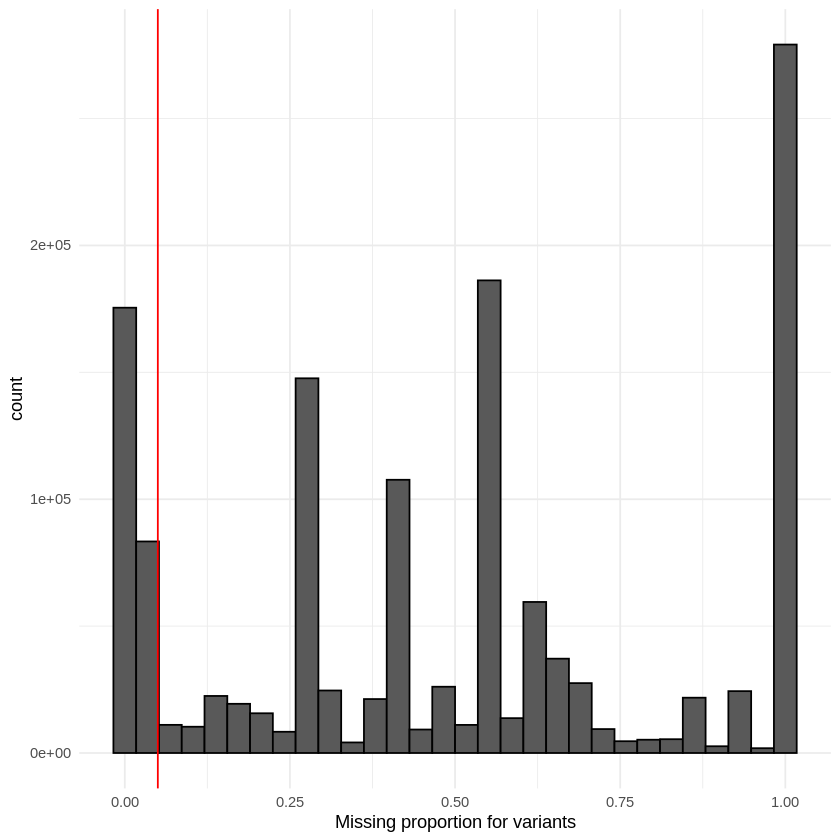

In [5]:
# missing, lmiss is for SNPs
lmiss <- read.table('GWA-QC-filtered-pheno.lmiss', header = T)
ggplot(lmiss) +
    geom_histogram(aes(x = F_MISS), col = 'black') + 
    labs(x = "Missing proportion for variants") +
    geom_vline(xintercept = 0.05, color = "red") +
    theme_minimal()

In [62]:
case_control_missing <- read.table('GWA-QC-filtered-pheno.missing', header = T)
#case_control_missing %>% filter(P < 1e-5)
min(case_control_missing$P)
case_control_missing

[1] 5.121e-06

CHR,SNP,F_MISS_A,F_MISS_U,P
<int>,<chr>,<dbl>,<dbl>,<dbl>
1,rs4477212,0.58230,0.55620,0.3312
1,rs12564807,0.60580,0.62870,0.4092
1,rs3094315,0.63760,0.62280,0.5797
1,rs3131972,0.04149,0.03254,0.3992
1,rs114525117,0.93080,0.93490,0.8309
1,rs148828841,0.60860,0.62720,0.4749
1,rs12562034,0.79940,0.79730,0.9469
1,rs12124819,0.30430,0.33430,0.2509
1,rs115093905,0.54220,0.56210,0.4844


In [63]:
case_control_missing %>% filter(P < 1e-5) # only one SNP significant

CHR,SNP,F_MISS_A,F_MISS_U,P
<int>,<chr>,<dbl>,<dbl>,<dbl>
12,rs12831626,0.03873,0.004438,5.121e-06


In [72]:
qc_list <- c('rs12831626')

In [73]:
qc_list

[1] "rs12831626"

In [74]:
write.table(qc_list, file = 'fail-diffmiss-qc.txt', col.names = F, row.names = F)